In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from sklearn.datasets import load_iris

In [4]:
df=load_iris()


In [5]:
print(df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
import seaborn as sns
df=sns.load_dataset("iris")

In [15]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
X=df.iloc[:,:-1]

In [17]:
y=df.iloc[:,-1]

In [18]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
#post prunning
treeclassifier=DecisionTreeClassifier()

In [24]:
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
from sklearn import tree

[Text(0.5, 0.9, 'x[3] <= 0.8\ngini = 0.662\nsamples = 75\nvalue = [21, 27, 27]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 21\nvalue = [21, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'x[2] <= 5.05\ngini = 0.5\nsamples = 54\nvalue = [0, 27, 27]'),
 Text(0.3076923076923077, 0.5, 'x[3] <= 1.6\ngini = 0.231\nsamples = 30\nvalue = [0, 26, 4]'),
 Text(0.15384615384615385, 0.3, 'x[1] <= 2.25\ngini = 0.077\nsamples = 25\nvalue = [0, 24, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 24\nvalue = [0, 24, 0]'),
 Text(0.46153846153846156, 0.3, 'x[1] <= 2.9\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8461538461538461, 0.5, 'x[2] <= 5.15\ngini = 0.08\nsamples = 24\nvalue = [0, 1, 23]'),
 Text(0.7692307692307693, 0.3, 'x[3] <= 1.7\ng

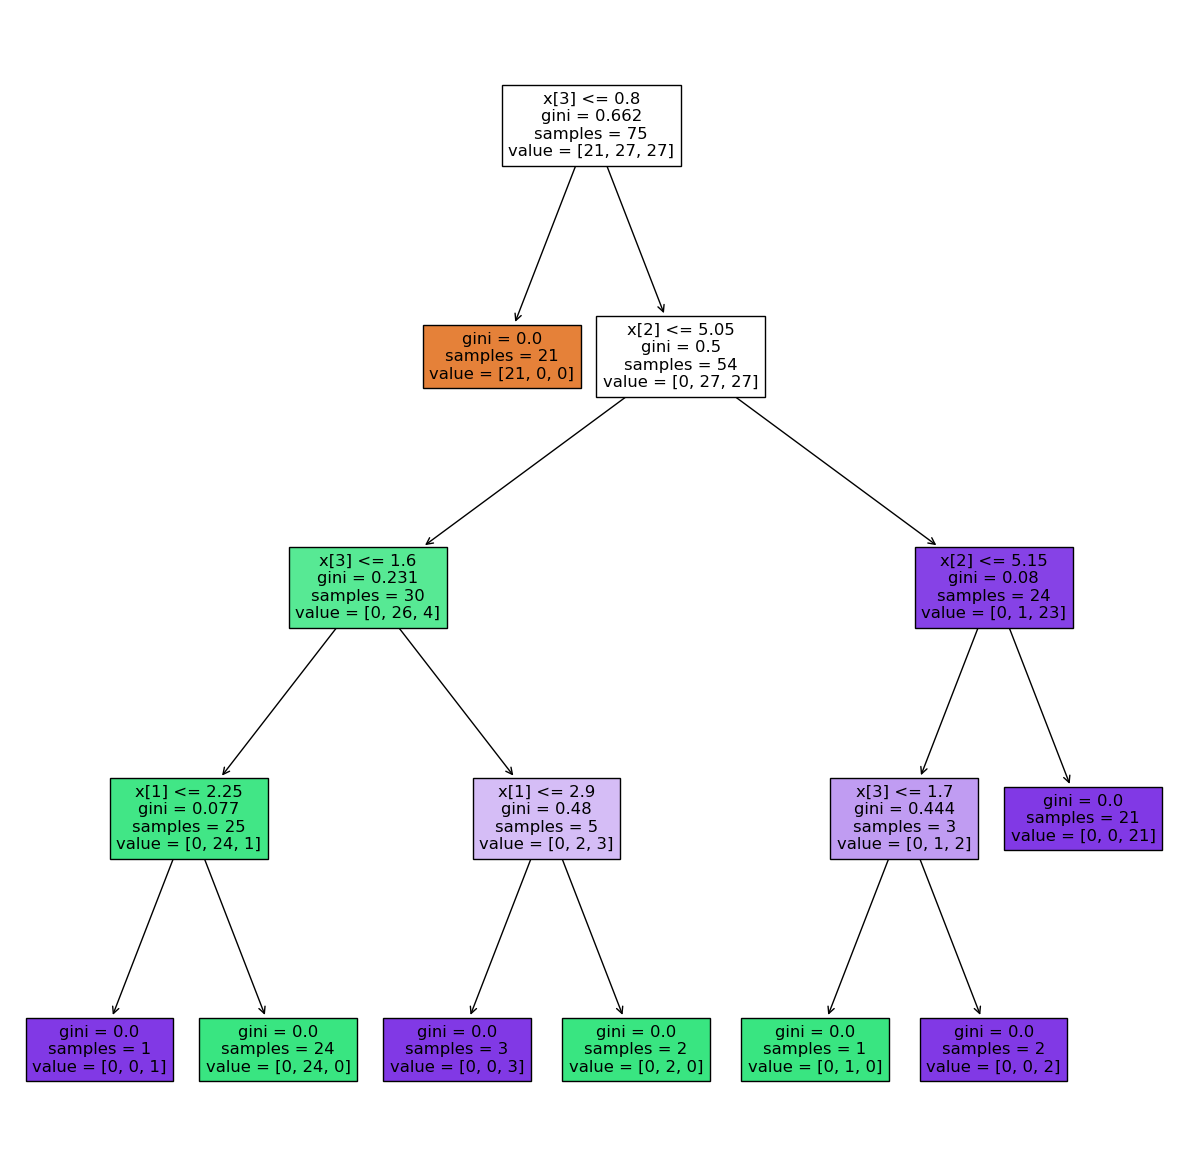

In [31]:
plt.figure(figsize=[15,15])
tree.plot_tree(treeclassifier,filled=True)

In [32]:
#post prunning with max_depth=2
treeclassifier=DecisionTreeClassifier(max_depth=2)

In [33]:
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.662\nsamples = 75\nvalue = [21, 27, 27]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 21\nvalue = [21, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 5.05\ngini = 0.5\nsamples = 54\nvalue = [0, 27, 27]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.231\nsamples = 30\nvalue = [0, 26, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.08\nsamples = 24\nvalue = [0, 1, 23]')]

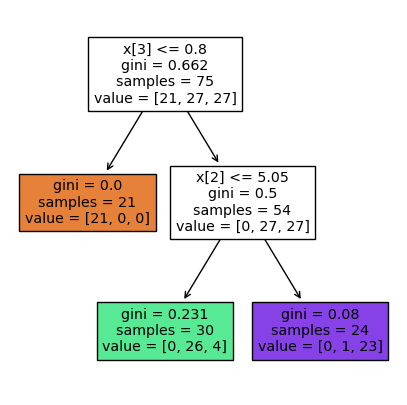

In [38]:
plt.figure(figsize=[5,5])
tree.plot_tree(treeclassifier,filled=True)

In [40]:
y_pred=treeclassifier.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score,classification_report

In [42]:
print(accuracy_score(y_test,y_pred))

0.9333333333333333
